## Observations and Insights 

Below are my main observations and insights from this analysis.

1)The study had an almost equal proportion of female (49%) and male (51%) subjects (see Pie Charts). The number of test subjects across the drug regimens were not equal; however, a power analysis would confirm if the sample sizes were adequate enough to detect any effects (see Bar Charts).

2) Looking more closely at the distributions of four drug regimens (Capomulin, Ramicane, Infubinol, and Ceftamin), there did not appear to be any outliers in the Capomulin, Ramicane, and Ceftamin regimens; however, Infubinol had a noticeably low outlier. Further investigation would be needed to determine whether or not it should be removed. Capomulin's distribution appeared to be slightly skewed toward a higher tumor volume (with the median being higher than the mean), but again, having no outliers would suggest a fairly robust distrubtion (see Quartiles, Outliers and Boxplots).  

3) The study results revealed that mice with the lowest tumor values were treated with either Capomulin (M = 40.68, SD= 4.99) or Ramicane (M= 40.22, SD= 0.32) (see Aggregate Summary Table). Follow-up statistical analyses are encouraged to confirm whether these drugs are in fact more effective than the other drug regimens.

4) A case observation of a mouse on the Capomulin drug regimen revealed that the tumor volume decreased over the 45 day treatment period (see Line Chart). Examinations of the entire subject pool of the Capomulin drug regimen are encouraged to see if this trend is consistent.

5) The results of our regression analysis suggest there is a fairly strong relation between a mouse's weight and the tumor volume (r2= 0.71) (see Correlation and Regression). 

As previously mentioned, more statistical analyses are encouraged to assess whether or not there are differences in tumor volumes among the different drug regimens, and to see if the study has sufficient power to detect those results.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge (mouse_metadata, study_results, how = 'left', on = 'Mouse ID')

# Display the data table for preview
mouse_study



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_mice = len(mouse_study["Mouse ID"].value_counts())

number_mice

249

In [3]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = mouse_study.loc[mouse_study.duplicated(["Mouse ID", "Timepoint"], keep="last")]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_ID = duplicate_mice["Mouse ID"].values[0]
dup_mouse_ID

'g989'

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse =mouse_study.loc[mouse_study["Mouse ID"] != "g989"]

clean_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
number_mice2 = len(clean_mouse["Mouse ID"].value_counts())

number_mice2

248

## Summary Statistics

In [7]:
#using the groupby function to generate summary statistics for each drug regimen
summary_regimen = clean_mouse.groupby(["Drug Regimen"])

#summary table for the mean tumor volume
mean_regimen = round(pd.DataFrame(summary_regimen['Tumor Volume (mm3)'].mean()),2)
mean_regimen


,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.68
Ceftamin,52.59
Infubinol,52.88
Ketapril,55.24
Naftisol,54.33
Placebo,54.03
Propriva,52.32
Ramicane,40.22
Stelasyn,54.23


In [8]:
#summary table for the median tumor volume
median_regimen = round(pd.DataFrame(summary_regimen['Tumor Volume (mm3)'].median()),2)
median_regimen

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.56
Ceftamin,51.78
Infubinol,51.82
Ketapril,53.70
Naftisol,52.51
Placebo,52.29
Propriva,50.45
Ramicane,40.67
Stelasyn,52.43


In [9]:
#summary table for the variance
variance= round(pd.DataFrame(summary_regimen['Tumor Volume (mm3)'].var()),2)
variance


,Tumor Volume (mm3)
Drug Regimen,
Capomulin,24.95
Ceftamin,39.29
Infubinol,43.13
Ketapril,68.55
Naftisol,66.17
Placebo,61.17
Propriva,43.85
Ramicane,23.49
Stelasyn,59.45


In [10]:
#summary table for the standard deviation
sd_regimen = round(pd.DataFrame(summary_regimen['Tumor Volume (mm3)'].std()),2)
sd_regimen


,Tumor Volume (mm3)
Drug Regimen,
Capomulin,4.99
Ceftamin,6.27
Infubinol,6.57
Ketapril,8.28
Naftisol,8.13
Placebo,7.82
Propriva,6.62
Ramicane,4.85
Stelasyn,7.71


In [11]:
#summary table for the SEM
sem_regimen = round(pd.DataFrame(summary_regimen['Tumor Volume (mm3)'].sem()),2)
sem_regimen

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.33
Ceftamin,0.47
Infubinol,0.49
Ketapril,0.60
Naftisol,0.60
Placebo,0.58
Propriva,0.54
Ramicane,0.32
Stelasyn,0.57


Aggregate Summary Table

In [12]:
# Assemble the resulting series into a single summary dataframe.
agg_summary_regimen = round(pd.DataFrame(summary_regimen.agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})),2)
                                   
agg_summary_regimen

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

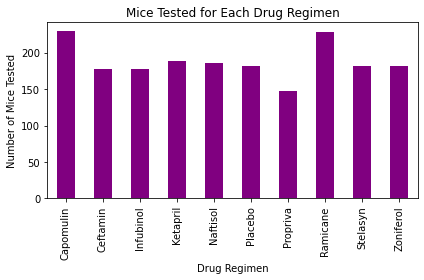

In [13]:
#Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pandas

#filter dataframe to only timepoint and drug regimen
summary_regimen = clean_mouse.groupby(["Drug Regimen"])

#number of timepoints
time_per_drug = summary_regimen["Timepoint"].count()

#chart the data
drug_reg_chart = time_per_drug.plot(kind="bar", title="Mice Tested for Each Drug Regimen", color = "purple")
drug_reg_chart.set_xlabel("Drug Regimen")
drug_reg_chart.set_ylabel("Number of Mice Tested")

plt.tight_layout()
plt.show();


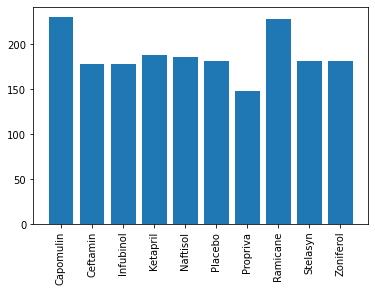

In [14]:
#generating bar chart using matplotlib
plt.bar(time_per_drug.index.values,time_per_drug.values)
plt.xticks(rotation = 90)
plt.show()

In [15]:
#obtaining summary of the number of females and males in the data
sex_group = clean_mouse["Sex"].value_counts()

Pie Charts

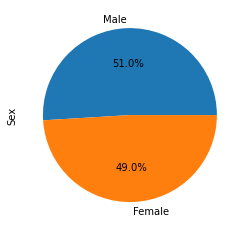

In [17]:
#creating a pie chart using pandas
sex_group.plot(kind="pie", autopct="%1.1f%%")

plt.show()

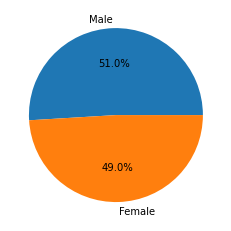

In [18]:
#creating a pue chart using matplotlib
plt.pie(sex_group.values, labels = sex_group.index.values, autopct="%1.1f%%")

plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
grouped_time = clean_mouse.groupby(["Mouse ID"])

max_time = pd.DataFrame(grouped_time['Timepoint'].max().reset_index())

#displaying dataframe with the maximum time by mouse ID
max_time

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [20]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_tumor_vol = pd.merge(max_time, clean_mouse, on =['Mouse ID', 'Timepoint'], how = "left")

max_tumor_vol

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

for drug in drugs:
   
    #create a dataframe with only the final timepoint for each regimen
    values= max_tumor_vol.loc[max_tumor_vol['Drug Regimen'] == drug,'Tumor Volume (mm3)']
    

    #finding the final tumor volumes for each drug regimen
    tumor_vol.append(values)
    
    # Calculate the IQR . 
    quartiles = values.quantile([.25,.5,.75])
    lowerq= quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # Computing upper and lower bounds to determine potential outliers
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    #printing statements identifying upper and lower bounds
    #print(f"Values below {lower_bound} could be outliers for {drugs}.")
    #print(f"Values above {upper_bound} could be outliers for {drugs}.")

    #identifying outliers
    outlier = values.loc[(values < lower_bound) | (values > upper_bound)]

    print(f"{drug}'s outlier is: {outlier}.")

    

Capomulin's outlier is: Series([], Name: Tumor Volume (mm3), dtype: float64).
Ramicane's outlier is: Series([], Name: Tumor Volume (mm3), dtype: float64).
Infubinol's outlier is: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64.
Ceftamin's outlier is: Series([], Name: Tumor Volume (mm3), dtype: float64).


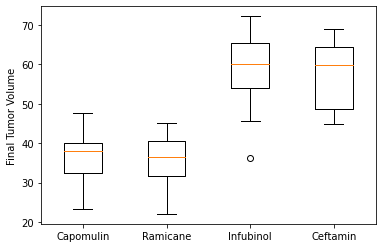

In [22]:
## Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_vol,labels=drugs)
plt.ylabel("Final Tumor Volume")

plt.show();

## Line and Scatter Plots

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#retaining only the columns needed for analysis
grouped_drug_df = clean_mouse.loc[:, ["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]

#displaying dataframe
#grouped_drug_df.head(15)

In [24]:
#setting our index to drug regimen
grouped_drug_df2 = grouped_drug_df.set_index("Drug Regimen")

#creating a dataset to contain Capomulin data only
capomulin_df = grouped_drug_df2.loc["Capomulin", :]

#displaying dataframe with capomulin
#capomulin_df

In [25]:
#selecting mouse s185 for plotting
capomulin_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]

#dataframe for mouse s185
#capomulin_mouse.head(10)

In [26]:
#setting timepoint as the index for the ease of referencing rows
capomulin_mouse2 = capomulin_mouse.set_index("Mouse ID")


In [27]:
#setting the x-axis
x_axis_data = capomulin_mouse2["Timepoint"].to_list()

#setting the y-axis
tumor_volume = capomulin_mouse2["Tumor Volume (mm3)"].to_list()

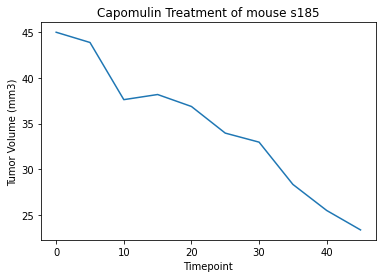

In [28]:
#plotting the tumor volumes as a line chart
plt.plot(x_axis_data, tumor_volume)
plt.title("Capomulin Treatment of mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
grouped_drug_df3 = mouse_study.loc[:, ["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)", "Weight (g)"]]

#displaying dataframe
#grouped_drug_df3


In [30]:
#setting our index to drug regimen
grouped_drug4 = grouped_drug_df3.set_index("Drug Regimen")

#displaying updated dataframe
#grouped_drug4


In [31]:
#creating a dataset to contain Capomulin data only
capomulin_weight = grouped_drug4.loc["Capomulin", :]

#displaying updated dataframe with Capomulin only
#capomulin_weight

In [32]:
#obtaining means
grouped_cap = capomulin_weight.groupby(["Mouse ID"])
mean_tumor = pd.DataFrame(grouped_cap['Tumor Volume (mm3)'].mean())
mean_weight = pd.DataFrame(grouped_cap["Weight (g)"].mean())

#print(mean_tumor)
#print(mean_weight)

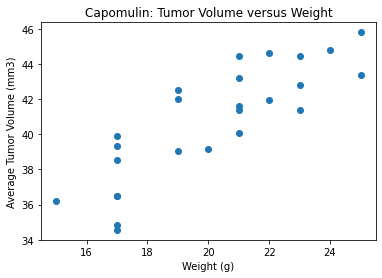

In [33]:
# generating the scatter plot for tumor volume versus mouse weight 
plt.scatter(mean_weight, mean_tumor)
plt.title("Capomulin: Tumor Volume versus Weight")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708717


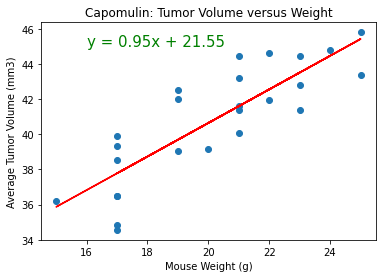

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = mean_weight['Weight (g)']
y_values = mean_tumor['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Capomulin: Tumor Volume versus Weight")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,45),fontsize=15,color="green")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()